In [178]:
from PIL import Image
import numpy as np
import os

data = {"data":[], "target":[]}
for folder, sub_folder, file in os.walk("../input/face-expression-recognition-dataset/images/train/"):
    folder_name = folder
    for i in file:
        img_ = folder_name + "/" + i
        image = Image.open(img_)
        image = image.resize((128, 128))
        data["data"].append(np.array(image))
        data["target"].append(folder_name.split("/")[-1])

In [179]:
print(data["data"][:10])
print(data["target"][:10])

[array([[252, 252, 253, ..., 254, 254, 254],
       [252, 252, 253, ..., 254, 254, 254],
       [253, 253, 253, ..., 254, 254, 254],
       ...,
       [ 22,  22,  21, ...,  93,  95,  97],
       [ 19,  19,  20, ...,  92,  98, 101],
       [ 18,  18,  20, ...,  92,  99, 102]], dtype=uint8), array([[253, 253, 254, ..., 252, 252, 252],
       [253, 253, 254, ..., 252, 252, 252],
       [254, 254, 254, ..., 253, 253, 253],
       ...,
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 253, 255, 255]], dtype=uint8), array([[215, 201, 165, ...,  79,  88,  92],
       [214, 200, 164, ...,  78,  85,  88],
       [209, 196, 161, ...,  73,  77,  78],
       ...,
       [131, 129, 117, ..., 106, 103, 103],
       [140, 143, 144, ..., 105, 102, 101],
       [143, 148, 155, ..., 105, 102, 100]], dtype=uint8), array([[215, 215, 215, ..., 228, 228, 228],
       [215, 215, 215, ..., 228, 228, 228],
       [216, 216, 216, ..., 226, 226, 

In [180]:
data["data"] = np.array(data["data"])
data["target"] = np.array(data["target"])

images_normalized = data["data"].astype('float32') / 255.0
images_normalized.reshape(images_normalized.shape[0], -1)
data["data"] = images_normalized

In [181]:
print(data["data"][:10])
print(data["target"][:10])

[[[0.9882353  0.9882353  0.99215686 ... 0.99607843 0.99607843 0.99607843]
  [0.9882353  0.9882353  0.99215686 ... 0.99607843 0.99607843 0.99607843]
  [0.99215686 0.99215686 0.99215686 ... 0.99607843 0.99607843 0.99607843]
  ...
  [0.08627451 0.08627451 0.08235294 ... 0.3647059  0.37254903 0.38039216]
  [0.07450981 0.07450981 0.07843138 ... 0.36078432 0.38431373 0.39607844]
  [0.07058824 0.07058824 0.07843138 ... 0.36078432 0.3882353  0.4       ]]

 [[0.99215686 0.99215686 0.99607843 ... 0.9882353  0.9882353  0.9882353 ]
  [0.99215686 0.99215686 0.99607843 ... 0.9882353  0.9882353  0.9882353 ]
  [0.99607843 0.99607843 0.99607843 ... 0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         1.         ... 0.99215686 1.         1.        ]
  [1.         1.         1.         ... 0.99215686 1.         1.        ]
  [1.         1.         1.         ... 0.99215686 1.         1.        ]]

 [[0.84313726 0.7882353  0.64705884 ... 0.30980393 0.34509805 0.36078432]
  [0.8392157  0.784313

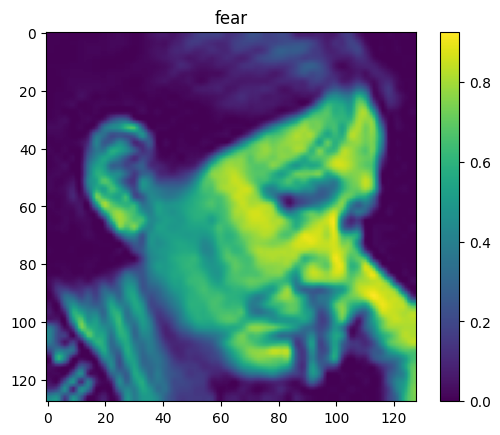

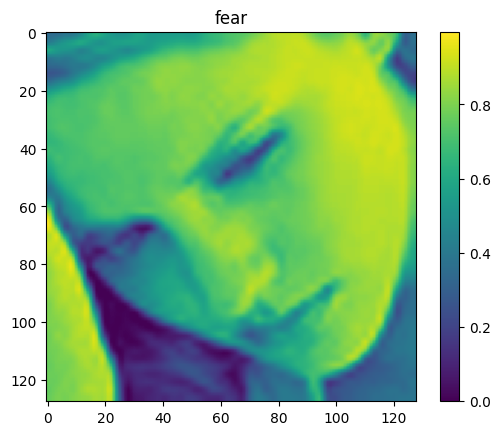

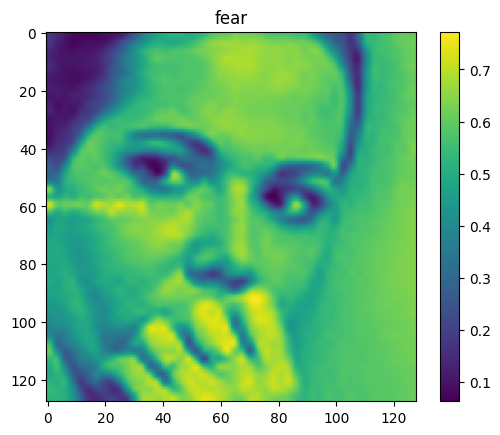

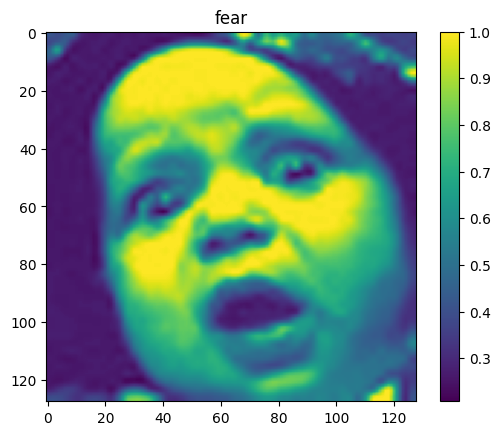

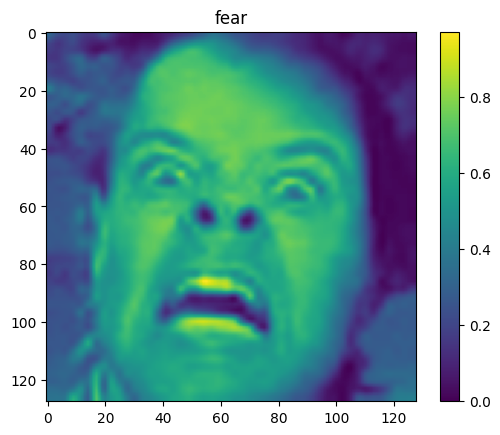

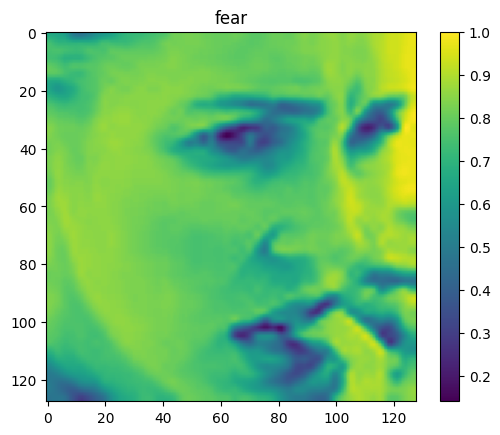

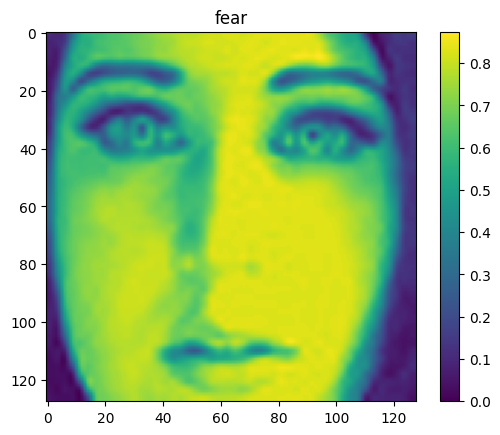

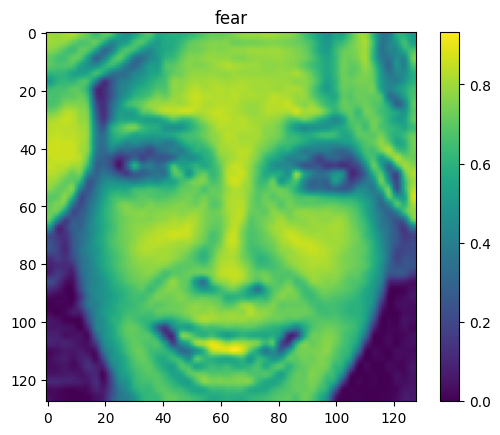

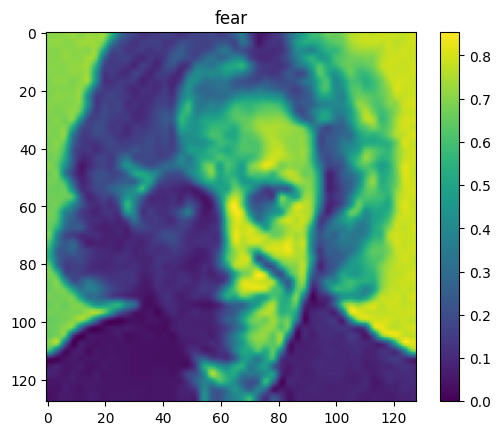

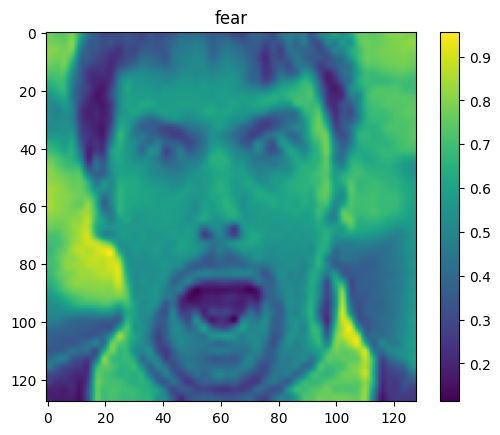

In [182]:
import matplotlib.pyplot as plt

index_s = 5300
index_f = 5310
for i in data["data"][index_s:index_f]:
    plt.imshow(i, origin="upper")
    plt.title(data["target"][index_s])
    plt.colorbar()
    plt.show()
    index_s += 1

In [183]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder_ = LabelEncoder()

integer_encoded = LabelEncoder_.fit_transform(data["target"])
print("Integer Encoded:", integer_encoded)

print("Original Labels:", data["target"])

data["target"] = np.array(integer_encoded)

Integer Encoded: [6 6 6 ... 3 3 3]
Original Labels: ['surprise' 'surprise' 'surprise' ... 'happy' 'happy' 'happy']


In [184]:
data["target"]

array([6, 6, 6, ..., 3, 3, 3])

In [185]:
from sklearn.model_selection import train_test_split

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [186]:
print(X_train.shape, X_test.shape)

(23056, 128, 128) (5765, 128, 128)


In [187]:
X_train_flat = np.reshape(X_train, (X_train.shape[0], -1))
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))

In [188]:
print(X_train_flat.shape, X_test_flat.shape)

(23056, 16384) (5765, 16384)


In [189]:
import pandas as pd
import numpy as np

df = pd.DataFrame(X_train_flat, columns=["feature_" + str(i) for i in range(X_train_flat.shape[1])])

df['label'] = y_train

df[:10]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16375,feature_16376,feature_16377,feature_16378,feature_16379,feature_16380,feature_16381,feature_16382,feature_16383,label
0,0.964706,0.964706,0.968627,0.972549,0.972549,0.964706,0.960784,0.960784,0.964706,0.964706,...,0.964706,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,2
1,0.541176,0.529412,0.509804,0.486275,0.478431,0.498039,0.494118,0.403922,0.274510,0.180392,...,0.160784,0.164706,0.160784,0.152941,0.141176,0.133333,0.129412,0.129412,0.133333,5
2,0.000000,0.007843,0.058824,0.145098,0.262745,0.411765,0.545098,0.603922,0.623529,0.600000,...,0.666667,0.654902,0.647059,0.635294,0.623529,0.607843,0.592157,0.580392,0.576471,2
3,0.305882,0.298039,0.286275,0.270588,0.262745,0.266667,0.266667,0.258824,0.247059,0.243137,...,0.227451,0.219608,0.215686,0.207843,0.200000,0.192157,0.184314,0.180392,0.180392,5
4,0.098039,0.098039,0.098039,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,...,0.423529,0.435294,0.454902,0.474510,0.498039,0.521569,0.545098,0.560784,0.564706,2
5,0.125490,0.125490,0.129412,0.137255,0.145098,0.145098,0.152941,0.164706,0.180392,0.188235,...,0.254902,0.329412,0.415686,0.513726,0.615686,0.678431,0.705882,0.717647,0.725490,2
6,0.917647,0.917647,0.917647,0.917647,0.917647,0.909804,0.905882,0.901961,0.901961,0.905882,...,0.070588,0.058824,0.066667,0.094118,0.125490,0.152941,0.172549,0.188235,0.192157,0
7,0.454902,0.450980,0.443137,0.435294,0.431373,0.439216,0.450980,0.450980,0.450980,0.447059,...,0.505882,0.474510,0.490196,0.572549,0.678431,0.760784,0.831373,0.882353,0.901961,0
8,0.360784,0.360784,0.360784,0.364706,0.384314,0.411765,0.439216,0.454902,0.462745,0.470588,...,0.384314,0.384314,0.384314,0.392157,0.400000,0.396078,0.388235,0.380392,0.372549,4
9,0.282353,0.294118,0.309804,0.333333,0.368627,0.411765,0.435294,0.419608,0.376471,0.341176,...,0.294118,0.305882,0.305882,0.282353,0.247059,0.235294,0.239216,0.243137,0.243137,0


In [221]:
from sklearn.tree import DecisionTreeClassifier

X_train_flat = X_train_flat[:90000]
X_test_flat = X_test_flat[:90000]

y_train = y_train[:90000]
y_test = y_test[:90000]

model = DecisionTreeClassifier()
model.fit(X_train_flat, y_train)

predicted = model.predict(X_test_flat)

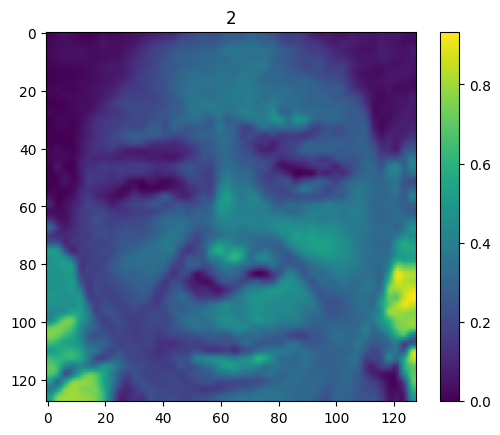

predict : [4]


In [222]:
import matplotlib.pyplot as plt

plt.imshow(X_test[85], origin="upper")
plt.title(y_test[85])
plt.colorbar()
plt.show()
print(f"predict : {model.predict(X_test_flat[85].reshape(1, -1))}")

In [192]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.2974848222029488


In [193]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
images_pca = pca.fit_transform(X_train_flat)

print(f"Original shape: {X_train_flat.shape}")
print(f"Reduced shape: {images_pca.shape}")

Original shape: (23056, 16384)
Reduced shape: (23056, 4)


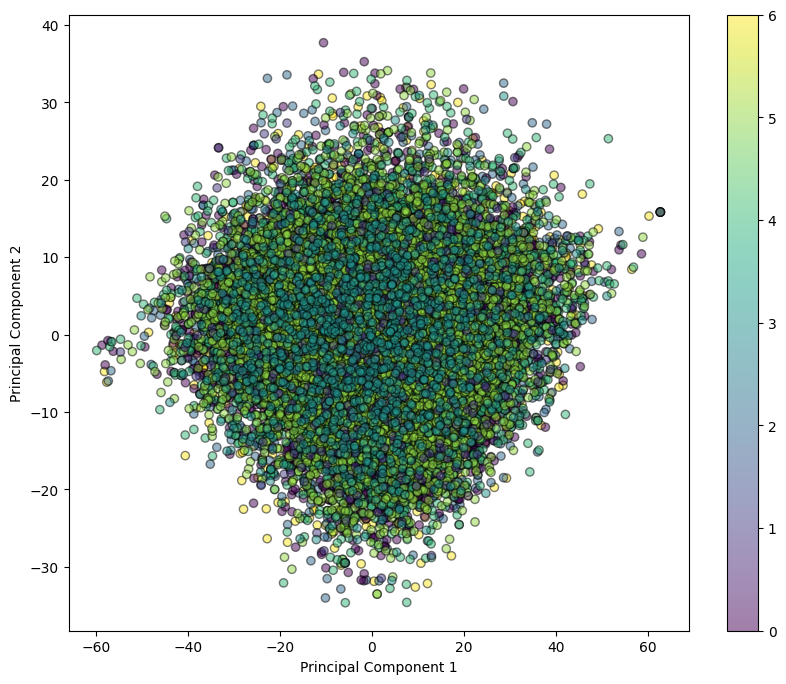

In [195]:
import matplotlib.pyplot as plt

component_1 = images_pca[:, 0]
component_2 = images_pca[:, 1]


plt.figure(figsize=(10, 8))
plt.scatter(component_1, component_2, c=data["target"][:len(component_1)], edgecolor='k', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [196]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(images_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
df['label'] = data["target"][:len(component_1)]

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='label')
fig.show()

In [197]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={"class_weight":[{0:2, 1:2, 2:2, 3:2, 4:2, 5:2, 6:2}]},
                    cv=4,
                    n_jobs=-1)

grid.fit(X_train_flat, y_train)
predicted = grid.predict(X_test_flat)

In [198]:
grid

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2,
                                           6: 2}]})

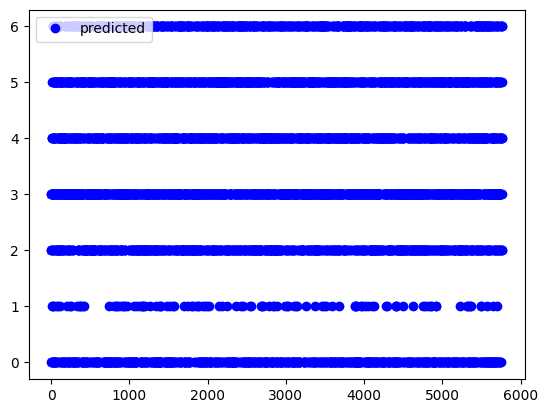

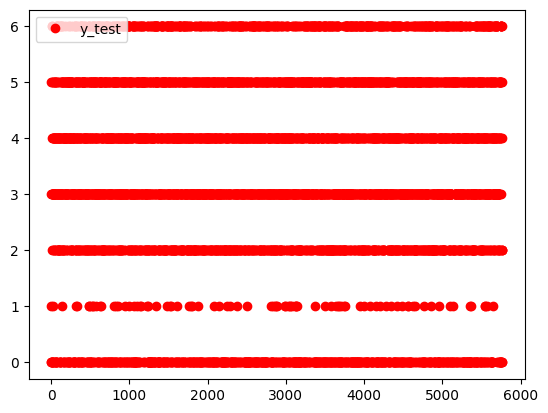

In [229]:
import matplotlib.pyplot as plt

plt.plot(predicted,'o', color='blue', label='predicted')
plt.legend()
plt.show()
plt.plot(y_test,'o', color='red', label='y_test')
plt.legend()
plt.show()

In [200]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_train_flat)
predicted_2 = kmeans.predict(X_test_flat)

In [201]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_2)
print("Accuracy:", accuracy)

Accuracy: 0.08655680832610581


In [202]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("scale", StandardScaler()), ("model", KMeans(n_clusters=6, n_init=10))])

pipe.fit(X_train_flat)
predicted_3 = pipe.predict(X_test_flat)

In [203]:
accuracy = accuracy_score(y_test, predicted_3)
print("Accuracy:", accuracy)

Accuracy: 0.15351257588898526
